# MTA Exploratory Data Analysis

## Introduction

> a lot of people in New York using The Metropolitan Transportation subways as main way for transportation. The MTA says that it is serving a population of 15.3 million people across a 5,000-square-mile travel area surrounding New York City through Long Island, southeastern New York State, and Connecticut. So it has a huge amount of traffic daily. So from that traffic the advertising companies will not miss that so when you enter any subway station you will notice there are many and huge billboards every where in the station.

## Problem 

> The problem here that these advertisement methods are old and not compatible with the traffic and what are they interested on.

## My Solution 

> I will analyze data to investigate if there are some patterns from the visitors to the MTA stations. To have better billboards and to have compatible advertisements to the people and to know what the value of the billboard and how many people is will see it.

## Data Wrangling 

> I Will using the datasets from The Metropolitan Authority website ((http://web.mta.info/developers/turnstile.html) and they are publish every week their turnstiles data it has 8 columns i will take the last 3 months . <br>
>> ▪ C/A: Control Area <br>
▪ UNIT: Remote Unit for a station <br>
▪ SCP: Subunit Channel Position represents a specific address for a device <br>
▪ STATION: Represents the station name the device is located at <br>
▪ LINE NAME: Represents all train lines that can be boarded at this station <br>
▪ DIVISION: Represents the Line originally the station belonged to <br>
▪ DATE: Represents the date in (MM-DD-YY) format <br>
▪ TIME: Represents the time (hh:mm:ss) for a scheduled audit event <br>
▪ DESC: Represent the "REGULAR" scheduled audit event <br>
▪ ENTRIES: The cumulative entry register value for a device <br>
▪ EXITS: The cumulative exit register value for a device <br>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FormatStrFormatter
import matplotlib.dates as mdates

%matplotlib inline

In [3]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [210605, 210612, 210619, 210626, 210703, 210710, 210717, 210724, 210731, 210807, 210814, 210821, 210828]

turnstiles_df = get_data(week_nums)

In [4]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,00:00:00,REGULAR,7578734,2590325
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,16:00:00,REGULAR,7578897,2590418


## Assessing Data

In [5]:
# Here we will list the columns 
list(turnstiles_df) 

['C/A',
 'UNIT',
 'SCP',
 'STATION',
 'LINENAME',
 'DIVISION',
 'DATE',
 'TIME',
 'DESC',
 'ENTRIES',
 'EXITS                                                               ']

In [6]:
# shape of the data
turnstiles_df.shape

(2722610, 11)

In [7]:
turnstiles_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2722610 entries, 0 to 209067
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count    Dtype 
---  ------                                                                --------------    ----- 
 0   C/A                                                                   2722610 non-null  object
 1   UNIT                                                                  2722610 non-null  object
 2   SCP                                                                   2722610 non-null  object
 3   STATION                                                               2722610 non-null  object
 4   LINENAME                                                              2722610 non-null  object
 5   DIVISION                                                              2722610 non-null  object
 6   DATE                                                                  2722610 non-n

<ipython-input-7-aaf6c11ca5e4>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  turnstiles_df.info(verbose=True, null_counts=True)


In [8]:
# Check for null values
turnstiles_df.isnull().sum()

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

In [9]:
turnstiles_df.describe()

,ENTRIES,EXITS
count,2.722610e+06,2.722610e+06
mean,4.168248e+07,3.329946e+07
std,2.185146e+08,1.919706e+08
min,0.000000e+00,0.000000e+00
25%,2.179232e+05,9.944325e+04
50%,1.405620e+06,8.552440e+05
75%,6.023157e+06,3.968192e+06
max,2.147417e+09,2.122890e+09


## Data Cleaning 

>▪ Delete the space from `EXITS       ` column <br>
▪ Delete duplicates (drop `RECOVR AUD` from `DESC` column)  <br>
▪ Filter the data to only daily entries and exits <br>
▪ Add `Daily_entries` coulmn by finding the diffrence from `ENTRIES` column <br> 
▪ Add `Daily_exits` coulmn by finding the diffrence from `EXITS` column <br> 
▪ Add `Daily_trafic` coulmn by using `Daily_exits` + `Daily_entries` <br> 
▪ Convert date to `day_of_week` and `month`


In [10]:
list(turnstiles_df) 

['C/A',
 'UNIT',
 'SCP',
 'STATION',
 'LINENAME',
 'DIVISION',
 'DATE',
 'TIME',
 'DESC',
 'ENTRIES',
 'EXITS                                                               ']

In [11]:
# Delete the tab from `EXITS       ` column
turnstiles_df = turnstiles_df.rename(columns={'EXITS                                                               ':"EXITS"})

In [12]:
list(turnstiles_df) 

['C/A',
 'UNIT',
 'SCP',
 'STATION',
 'LINENAME',
 'DIVISION',
 'DATE',
 'TIME',
 'DESC',
 'ENTRIES',
 'EXITS']

In [13]:
# Delete duplicates (drop RECOVR AUD from DESC column)
turnstiles_df.DESC.value_counts()

REGULAR       2710456
RECOVR AUD      12154
Name: DESC, dtype: int64

In [14]:
turnstiles_df = turnstiles_df[turnstiles_df['DESC'] == 'REGULAR']

In [15]:
turnstiles_df.DESC.value_counts()

REGULAR    2710456
Name: DESC, dtype: int64

In [16]:
# Filter the data to only daily entries and exits
df_daily = (turnstiles_df.groupby([ 'C/A','UNIT','SCP','STATION','DATE']).ENTRIES.max().reset_index())

In [17]:
df_daily['EXITS'] = (turnstiles_df.groupby(['C/A','UNIT','SCP','STATION','DATE']).EXITS.max().reset_index().EXITS)

In [18]:
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,05/29/2021,7579021,2590439
1,A002,R051,02-00-00,59 ST,05/30/2021,7579275,2590548
2,A002,R051,02-00-00,59 ST,05/31/2021,7579593,2590641
3,A002,R051,02-00-00,59 ST,06/01/2021,7580178,2590917
4,A002,R051,02-00-00,59 ST,06/02/2021,7580754,2591200


In [19]:
# Add Daily_entries coulmn by finding the diffrence from ENTRIES column 

df_daily['DAILY_ENTRIES']= df_daily['ENTRIES'].diff()

df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,DAILY_ENTRIES
0,A002,R051,02-00-00,59 ST,05/29/2021,7579021,2590439,NaN
1,A002,R051,02-00-00,59 ST,05/30/2021,7579275,2590548,254.0
2,A002,R051,02-00-00,59 ST,05/31/2021,7579593,2590641,318.0
3,A002,R051,02-00-00,59 ST,06/01/2021,7580178,2590917,585.0
4,A002,R051,02-00-00,59 ST,06/02/2021,7580754,2591200,576.0


In [20]:
# Add Daily_exits coulmn by finding the diffrence from EXITS column
df_daily['DAILY_EXITS']= df_daily['EXITS'].diff()
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,DAILY_ENTRIES,DAILY_EXITS
0,A002,R051,02-00-00,59 ST,05/29/2021,7579021,2590439,NaN,NaN
1,A002,R051,02-00-00,59 ST,05/30/2021,7579275,2590548,254.0,109.0
2,A002,R051,02-00-00,59 ST,05/31/2021,7579593,2590641,318.0,93.0
3,A002,R051,02-00-00,59 ST,06/01/2021,7580178,2590917,585.0,276.0
4,A002,R051,02-00-00,59 ST,06/02/2021,7580754,2591200,576.0,283.0


In [21]:
# Solve the negetive values on Daily_entries and Daily_exits
df_daily['PREV_ENTRIES'] = df_daily['ENTRIES'].shift(1)
df_daily['PREV_EXITS'] = df_daily['EXITS'].shift(1)

In [22]:
def get_daily_counts(row, max_counter, name):
    counter = row[name] - row["PREV_"+name]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        counter = min(row[name], row["PREV_"+name])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

df_daily["DAILY_ENTRIES"] = df_daily.apply(get_daily_counts, axis=1, max_counter=500000, name="ENTRIES")
df_daily["DAILY_EXITS"] = df_daily.apply(get_daily_counts, axis=1, max_counter=500000, name="EXITS")
df_daily.dropna(inplace= True)


Check Results

In [23]:
df_daily[((df_daily.ENTRIES ==0) & (df_daily.DAILY_ENTRIES < 0)) | (df_daily.ENTRIES ==0) & (df_daily.DAILY_EXITS < 0)].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,DAILY_ENTRIES,DAILY_EXITS,PREV_ENTRIES,PREV_EXITS


In [24]:
df_daily[((df_daily.ENTRIES != 0) & (df_daily.DAILY_ENTRIES < 0)) | (df_daily.ENTRIES != 0) & (df_daily.DAILY_EXITS < 0)].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,DAILY_ENTRIES,DAILY_EXITS,PREV_ENTRIES,PREV_EXITS


In [25]:
# Add Daily_trafic coulmn by using Daily_exits + Daily_entries
df_daily['DAILY_TRAFIC']= df_daily['DAILY_ENTRIES'] + df_daily['DAILY_EXITS']

In [26]:
# df_daily.drop(['DAILY_ENTRIES','DAILY_EXITS'],axis=1,inplace=True)

In [27]:
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,DAILY_ENTRIES,DAILY_EXITS,PREV_ENTRIES,PREV_EXITS,DAILY_TRAFIC
1,A002,R051,02-00-00,59 ST,05/30/2021,7579275,2590548,254.0,109.0,7579021.0,2590439.0,363.0
2,A002,R051,02-00-00,59 ST,05/31/2021,7579593,2590641,318.0,93.0,7579275.0,2590548.0,411.0
3,A002,R051,02-00-00,59 ST,06/01/2021,7580178,2590917,585.0,276.0,7579593.0,2590641.0,861.0
4,A002,R051,02-00-00,59 ST,06/02/2021,7580754,2591200,576.0,283.0,7580178.0,2590917.0,859.0
5,A002,R051,02-00-00,59 ST,06/03/2021,7581328,2591445,574.0,245.0,7580754.0,2591200.0,819.0


In [28]:
# convert date to day_of_week and month
df_daily['DATE'] = pd.to_datetime(df_daily['DATE'])


df_daily['month'] = df_daily['DATE'].apply(lambda x: x.strftime('%B').lower())
df_daily['day_of_week'] = df_daily['DATE'].apply(lambda x: x.strftime('%A').lower())

In [29]:
# List of days in order
day_order = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday',
       'sunday']
# create ordered categorical variable
df_daily['day_of_week'] = pd.Categorical(df_daily['day_of_week'],
                                               categories= day_order,
                                               ordered = True)

In [30]:
df_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,DAILY_ENTRIES,DAILY_EXITS,PREV_ENTRIES,PREV_EXITS,DAILY_TRAFIC,month,day_of_week
1,A002,R051,02-00-00,59 ST,2021-05-30,7579275,2590548,254.0,109.0,7579021.0,2590439.0,363.0,may,sunday
2,A002,R051,02-00-00,59 ST,2021-05-31,7579593,2590641,318.0,93.0,7579275.0,2590548.0,411.0,may,monday
3,A002,R051,02-00-00,59 ST,2021-06-01,7580178,2590917,585.0,276.0,7579593.0,2590641.0,861.0,june,tuesday
4,A002,R051,02-00-00,59 ST,2021-06-02,7580754,2591200,576.0,283.0,7580178.0,2590917.0,859.0,june,wednesday
5,A002,R051,02-00-00,59 ST,2021-06-03,7581328,2591445,574.0,245.0,7580754.0,2591200.0,819.0,june,thursday


In [31]:
df_daily.day_of_week.value_counts()

tuesday      64925
monday       64924
wednesday    64907
thursday     64890
sunday       64876
saturday     64847
friday       64826
Name: day_of_week, dtype: int64

## Saving the dataset into csv file

In [32]:
df_daily.to_csv('DAILY_TRAFIC.csv') 

## Explatory Data Analysis

In [33]:
# to see numbers on better format
pd.set_option('float_format', '{:2f}'.format)

In [34]:
# Group by to find trafic for Top 5 stations
df_station = df_daily.groupby(['STATION']).DAILY_TRAFIC.sum().reset_index().sort_values(['DAILY_TRAFIC'],ascending=False).head()

In [35]:
# Group by to find trafic for Bottom 5 stations
df_station_tail = df_daily.groupby(['STATION']).DAILY_TRAFIC.sum().reset_index().sort_values(['DAILY_TRAFIC'],ascending=False).tail()

In [36]:
# Group by to find trafic for every station and Date
df_station_day =  df_daily.groupby(['STATION','DATE']).DAILY_TRAFIC.sum().reset_index()

In [37]:
# Group by to find trafic for every station and control area
df_CA_day =  df_daily.groupby(['STATION','C/A']).DAILY_TRAFIC.sum().reset_index().sort_values(['DAILY_TRAFIC'],ascending=False)

In [38]:
# Group by to find the trafic for every unit ,station and control area
df_unit = df_daily.groupby(['STATION','C/A','UNIT']).DAILY_TRAFIC.sum().reset_index().sort_values(['DAILY_TRAFIC'],ascending=False)

In [39]:
# Choose the top 1 station trafic
df_unit = df_unit[df_unit["STATION"] == '34 ST-PENN STA']

In [40]:
# Choose the top 1 station trafic
df_CA_day = df_CA_day[df_CA_day["STATION"] == '34 ST-PENN STA']

In [41]:
# To find the top 5 stations
x = df_station.STATION.tolist()

In [42]:
# Filter the dataframe for top 5 stations
boolean_series = df_station_day.STATION.isin(x)
df_station_day = df_station_day[boolean_series]

In [51]:
# drop the first day since it has a lot of missing entries for trafic
df_station_day = df_station_day[ df_station_day['DATE'] != '2021-05-29']

### Comparison between the top 5 Stations for 3 months.

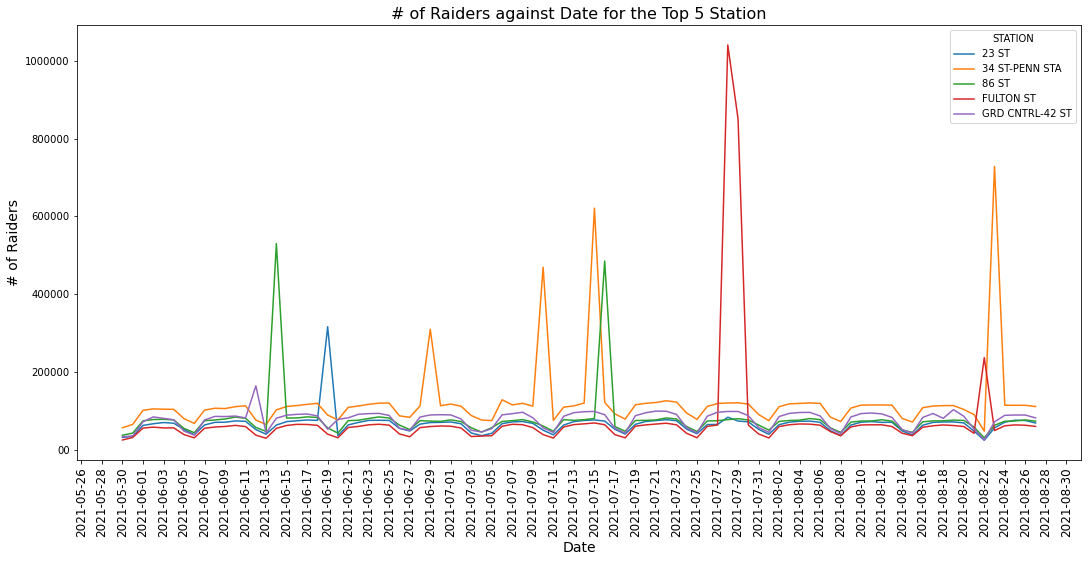

In [52]:
plt.figure(figsize = [18,8]);
axx = sns.lineplot(data=df_station_day,x='DATE',y='DAILY_TRAFIC',hue='STATION', color=sns.color_palette()[0], ci=None,);
plt.xlabel('Date', fontsize = '14');
plt.ylabel('# of Raiders',  fontsize = '14');
plt.title('# of Raiders against Date for the Top 5 Station',fontsize = '16');
axx.xaxis.set_major_locator(mdates.DayLocator(interval=2))
axx.yaxis.set_major_formatter(FormatStrFormatter('%.2i'))
plt.xticks(rotation = 90, fontsize = '12');

From here we can see that `34 ST-PENN STA` station was the busiest station but there are some interesting dates like the `2021-07-28` was the busiest day for the `FULTON ST` station it was the was the largest traffic between the 5 stations on a day. 

So i will recommend to advertising companies to put their ads on the days that have the highest traffic.


### Comparison between the top 5 stations and the bottom 5 stations.

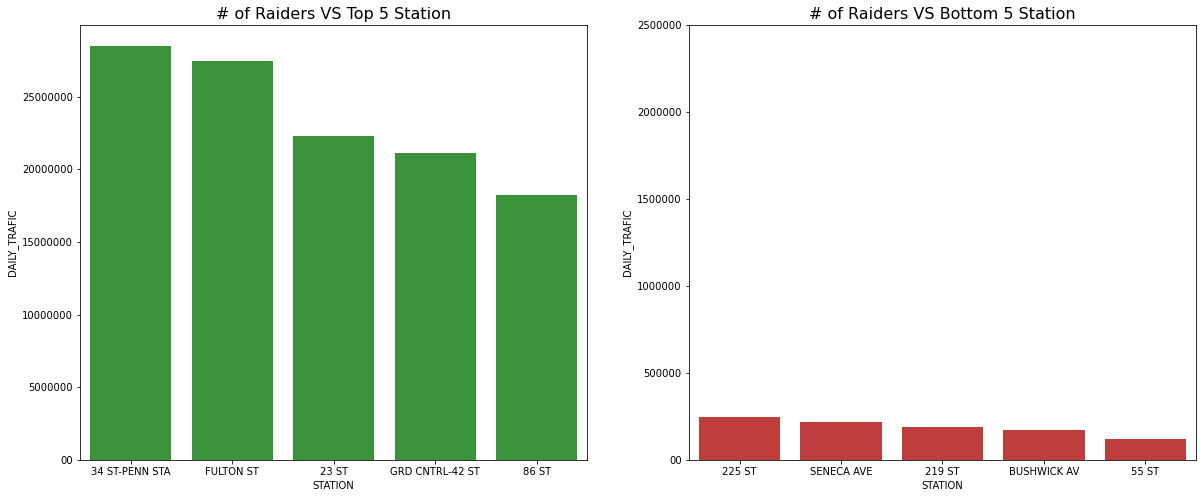

In [45]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(20)
fig.set_figheight(8)
axes[0].set_title("# of Raiders VS Top 5 Station",  fontsize = '16')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.2i'))
sns.barplot(ax=axes[0],data=df_station,x='STATION',y='DAILY_TRAFIC',color=sns.color_palette()[2] ,ci=None);
axes[1].set_title("# of Raiders VS Bottom 5 Station",  fontsize = '16')
axes[1].yaxis.set_major_formatter(FormatStrFormatter('%.2i'))
axes[1] = sns.barplot(ax=axes[1],data=df_station_tail,x='STATION',y='DAILY_TRAFIC',color=sns.color_palette()[3], ci=None);
ticks_y = np.linspace(0, 2500000,6)
plt.yticks(ticks_y);
plt.show()

From here we can notice that there are a huge deference on traffic between them. like the station `86 ST` it has more traffic than the bottom 5 stations combined!. 

So i will recommend that the ads should focus on the busiest stations. 

### Comparison between the Control Units and number of raiders.

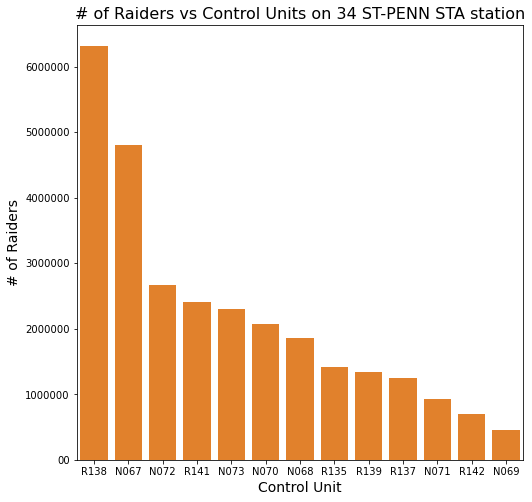

In [54]:
plt.figure(figsize = [8,8]);
ax =sns.barplot(data=df_CA_day,x='C/A',y='DAILY_TRAFIC',color=sns.color_palette()[1] ,ci=None);
plt.xlabel('Control Unit',  fontsize = '14');
plt.ylabel('# of Raiders',  fontsize = '14');
plt.title('# of Raiders vs Control Units on 34 ST-PENN STA station',  fontsize = '16');
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2i'))
plt.xticks(rotation = 0);

From this graph we notice that even on control units there is a large difference on traffic for each control unit for example the control unit `R138` has more than triple raiders on the control unit `R135`.

So i will recommend for advertisment company to put thier ads on the busiest control units.

### Comparison between the Units and number of raiders.

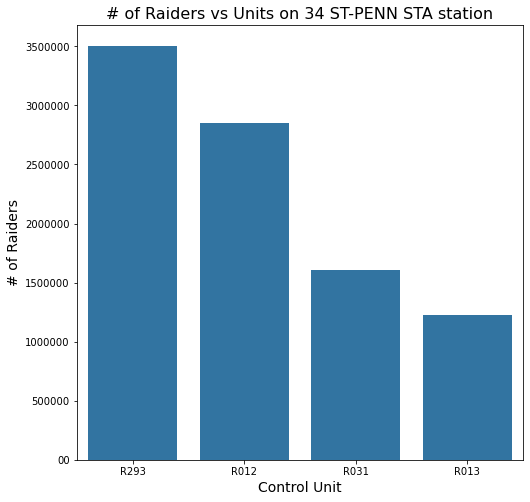

In [57]:
plt.figure(figsize = [8,8]);
ax =sns.barplot(data=df_unit,x='UNIT',y='DAILY_TRAFIC',color=sns.color_palette()[0] ,ci=None);
plt.xlabel('Control Unit',  fontsize = '14');
plt.ylabel('# of Raiders',  fontsize = '14');
plt.title('# of Raiders vs Units on 34 ST-PENN STA station',  fontsize = '16');
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2i'))
plt.xticks(rotation = 0);

From this graph we notice that even on units there is a large deference on traffic for each unit for example the unit `R293` has more than double raiders on the unit `R035`.

So i will recommend for advertisment company to put thier ads on the busiest units.

## Conclusion 

> This is a sample of how we can use the MTA data to improve your ads at the station on MTA subways... <br>
here i have took the last 3 months for this analysis and i had some very intresting insights that may help your company to have better viewrs ads on the subways or even to better negotiate with the MTA to put your ads. 
>> The insights i have noticed: <br>
▪ Found busy days for stations <br>
▪ Comparison between the Top Stations and bottom stations and found there is a very large deffrence. <br>
▪ Have better understand that where is the busiest Control Units <br> 
▪ Have better understand that where is the busiest Units <br> 

> For future work i think we will have better understanding for the people and what method to use for advertising when using analysis based on demographics and geographic data. 